In [1]:
import jax
import jax.numpy as jnp
from jax import random

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("./"))))

from jaxmeta.model_init import init_siren_params

from training import Agent
from loss import model, loss_fn, evaluate_fn
from data import generate_dataset, generate_batch_fn
import config

%load_ext autoreload
%autoreload 2

name = "1"

config.PATH = "experiments_1"
config.NAME = "{}/{}".format(config.PATH, name)
config.log_file = sys.stdout

config.layers = [2] + [32]*4 + [2]
config.c0 = 1.0
config.w0 = jnp.array([[1.0, 1.0]]).T

key, *subkeys = random.split(config.key, 3)
params = init_siren_params(subkeys[0], config.layers, config.c0, config.w0)

config.n_data = {
	"i": 160, "b": 160, "cx": 160, "ct": 160,
}
config.batch_size = {
	"dirichlet": (config.n_data["i"] + 2*config.n_data["b"]),
	"collocation": (config.n_data["cx"]*config.n_data["ct"]),
}
config.weights = {
	"c1": 1.0,
	"c2": 10.0,
	"d1": 10.0,
	"d2": 10.0,
	"l1": 1e-8,
	"l2": 1e-8,
}

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"])
batch_fn, evaluate_batch_fn = generate_batch_fn(subkeys[1], config.batch_size, *datasets, config.weights)

config.iterations = 500000
config.print_every = 1000
config.lr = 1e-3

agent = Agent(params, loss_fn, evaluate_fn, "models/{}".format(config.NAME))
agent.compile(config.optimizer, config.lr)
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

# n_batchs = 1
# scale = 1e-2
# options = {
# 	"maxiter": 100000,
# 	"line_search_maxiter": 1000,
# }
# params_ = agent.train_bfgs(n_batchs, batch_fn, options, config.loss_names, config.log_file, scale = scale)

2020/09/12, 18:04:12, Iteration: 1000, Train Loss: 2.2142e+00, c1: 1.1471e-01, c2: 7.9627e-02, d1: 5.8331e-02, d2: 7.1990e-02, l1_reg: 3.2991e+02, l2_reg: 5.5831e+01
2020/09/12, 18:04:22, Iteration: 2000, Train Loss: 1.8190e+00, c1: 1.0615e-01, c2: 1.0114e-01, d1: 5.8405e-02, d2: 1.1746e-02, l1_reg: 3.3567e+02, l2_reg: 5.9921e+01
2020/09/12, 18:04:31, Iteration: 3000, Train Loss: 1.6200e+00, c1: 7.3350e-02, c2: 9.3459e-02, d1: 4.9049e-02, d2: 1.2157e-02, l1_reg: 3.3977e+02, l2_reg: 6.2580e+01
2020/09/12, 18:04:40, Iteration: 4000, Train Loss: 1.4220e+00, c1: 1.0348e-01, c2: 7.8534e-02, d1: 4.3287e-02, d2: 1.0030e-02, l1_reg: 3.4515e+02, l2_reg: 6.5999e+01
2020/09/12, 18:04:50, Iteration: 5000, Train Loss: 1.4069e+00, c1: 7.3845e-02, c2: 7.5303e-02, d1: 4.2635e-02, d2: 1.5368e-02, l1_reg: 3.4731e+02, l2_reg: 6.7861e+01
2020/09/12, 18:06:44, Iteration: 17000, Train Loss: 7.9915e-01, c1: 8.2229e-02, c2: 3.7014e-02, d1: 2.7173e-02, d2: 7.5052e-03, l1_reg: 3.8075e+02, l2_reg: 8.9403e+01
202

2020/09/12, 18:13:46, Iteration: 62000, Train Loss: 3.4103e-01, c1: 4.4006e-02, c2: 1.5207e-02, d1: 1.2047e-02, d2: 2.4474e-03, l1_reg: 4.3988e+02, l2_reg: 1.3888e+02
2020/09/12, 18:13:56, Iteration: 63000, Train Loss: 3.5967e-01, c1: 4.1865e-02, c2: 1.4856e-02, d1: 1.2655e-02, d2: 4.2696e-03, l1_reg: 4.4067e+02, l2_reg: 1.3954e+02
2020/09/12, 18:14:05, Iteration: 64000, Train Loss: 3.6551e-01, c1: 3.5421e-02, c2: 1.5111e-02, d1: 1.1852e-02, d2: 6.0454e-03, l1_reg: 4.4135e+02, l2_reg: 1.4020e+02
2020/09/12, 18:14:15, Iteration: 65000, Train Loss: 3.5527e-01, c1: 4.3521e-02, c2: 1.6126e-02, d1: 1.1572e-02, d2: 3.4769e-03, l1_reg: 4.4225e+02, l2_reg: 1.4093e+02
2020/09/12, 18:14:24, Iteration: 66000, Train Loss: 3.7704e-01, c1: 5.1130e-02, c2: 1.5201e-02, d1: 1.2683e-02, d2: 4.7068e-03, l1_reg: 4.4279e+02, l2_reg: 1.4148e+02
2020/09/12, 18:14:34, Iteration: 67000, Train Loss: 3.4534e-01, c1: 3.0840e-02, c2: 1.4790e-02, d1: 1.2388e-02, d2: 4.2717e-03, l1_reg: 4.4366e+02, l2_reg: 1.4218e+0

2020/09/12, 18:21:27, Iteration: 111000, Train Loss: 2.9023e-01, c1: 4.5396e-02, c2: 1.3063e-02, d1: 9.3154e-03, d2: 2.1046e-03, l1_reg: 4.6761e+02, l2_reg: 1.6952e+02
2020/09/12, 18:21:36, Iteration: 112000, Train Loss: 2.4788e-01, c1: 2.4181e-02, c2: 1.1954e-02, d1: 8.6926e-03, d2: 1.7224e-03, l1_reg: 4.6812e+02, l2_reg: 1.7013e+02
2020/09/12, 18:21:46, Iteration: 113000, Train Loss: 2.7273e-01, c1: 3.1816e-02, c2: 1.0369e-02, d1: 9.1849e-03, d2: 4.5371e-03, l1_reg: 4.6856e+02, l2_reg: 1.7072e+02
2020/09/12, 18:21:55, Iteration: 114000, Train Loss: 2.7357e-01, c1: 3.0868e-02, c2: 1.1180e-02, d1: 1.0341e-02, d2: 2.7490e-03, l1_reg: 4.6911e+02, l2_reg: 1.7134e+02
2020/09/12, 18:22:05, Iteration: 115000, Train Loss: 2.7626e-01, c1: 3.4963e-02, c2: 1.0010e-02, d1: 9.1837e-03, d2: 4.9358e-03, l1_reg: 4.6956e+02, l2_reg: 1.7193e+02
2020/09/12, 18:22:14, Iteration: 116000, Train Loss: 2.4909e-01, c1: 2.6864e-02, c2: 1.0347e-02, d1: 9.8458e-03, d2: 2.0293e-03, l1_reg: 4.7002e+02, l2_reg: 1.7

2020/09/12, 18:29:08, Iteration: 160000, Train Loss: 2.3904e-01, c1: 2.3852e-02, c2: 9.9507e-03, d1: 8.1635e-03, d2: 3.4042e-03, l1_reg: 4.8778e+02, l2_reg: 1.9693e+02
2020/09/12, 18:29:18, Iteration: 161000, Train Loss: 2.2619e-01, c1: 3.5188e-02, c2: 9.8217e-03, d1: 8.3700e-03, d2: 9.0744e-04, l1_reg: 4.8842e+02, l2_reg: 1.9757e+02
2020/09/12, 18:29:28, Iteration: 162000, Train Loss: 2.6419e-01, c1: 2.7946e-02, c2: 1.0179e-02, d1: 8.2825e-03, d2: 5.1616e-03, l1_reg: 4.8899e+02, l2_reg: 1.9817e+02
2020/09/12, 18:29:37, Iteration: 163000, Train Loss: 2.3145e-01, c1: 2.5044e-02, c2: 9.5596e-03, d1: 7.7087e-03, d2: 3.3720e-03, l1_reg: 4.8955e+02, l2_reg: 1.9876e+02
2020/09/12, 18:29:46, Iteration: 164000, Train Loss: 2.1887e-01, c1: 2.6656e-02, c2: 9.6200e-03, d1: 8.5026e-03, d2: 1.0980e-03, l1_reg: 4.8998e+02, l2_reg: 1.9925e+02
2020/09/12, 18:29:56, Iteration: 165000, Train Loss: 2.7456e-01, c1: 3.4738e-02, c2: 1.0245e-02, d1: 8.6482e-03, d2: 5.0884e-03, l1_reg: 4.9037e+02, l2_reg: 1.9

2020/09/12, 18:36:49, Iteration: 209000, Train Loss: 2.0824e-01, c1: 2.8141e-02, c2: 8.5337e-03, d1: 7.4002e-03, d2: 2.0754e-03, l1_reg: 5.0775e+02, l2_reg: 2.2196e+02
2020/09/12, 18:36:59, Iteration: 210000, Train Loss: 2.3805e-01, c1: 2.2759e-02, c2: 8.6368e-03, d1: 7.0085e-03, d2: 5.8830e-03, l1_reg: 5.0818e+02, l2_reg: 2.2244e+02
2020/09/12, 18:37:08, Iteration: 211000, Train Loss: 2.1197e-01, c1: 2.8049e-02, c2: 9.4652e-03, d1: 7.4955e-03, d2: 1.4306e-03, l1_reg: 5.0889e+02, l2_reg: 2.2310e+02
2020/09/12, 18:37:17, Iteration: 212000, Train Loss: 2.4655e-01, c1: 2.4290e-02, c2: 8.8129e-03, d1: 7.5737e-03, d2: 5.8387e-03, l1_reg: 5.0907e+02, l2_reg: 2.2354e+02
2020/09/12, 18:37:27, Iteration: 213000, Train Loss: 2.1007e-01, c1: 2.4820e-02, c2: 9.0224e-03, d1: 7.1071e-03, d2: 2.3949e-03, l1_reg: 5.0968e+02, l2_reg: 2.2411e+02
2020/09/12, 18:37:36, Iteration: 214000, Train Loss: 2.0115e-01, c1: 3.0097e-02, c2: 8.8174e-03, d1: 6.9273e-03, d2: 1.3596e-03, l1_reg: 5.1046e+02, l2_reg: 2.2

2020/09/12, 18:44:29, Iteration: 258000, Train Loss: 2.0760e-01, c1: 2.5902e-02, c2: 9.2329e-03, d1: 7.2254e-03, d2: 1.7106e-03, l1_reg: 5.3233e+02, l2_reg: 2.5052e+02
2020/09/12, 18:44:38, Iteration: 259000, Train Loss: 1.6297e-01, c1: 2.3332e-02, c2: 6.9593e-03, d1: 6.4027e-03, d2: 6.0069e-04, l1_reg: 5.3277e+02, l2_reg: 2.5102e+02
2020/09/12, 18:44:47, Iteration: 260000, Train Loss: 1.8807e-01, c1: 2.4501e-02, c2: 8.3577e-03, d1: 6.8009e-03, d2: 1.1975e-03, l1_reg: 5.3313e+02, l2_reg: 2.5165e+02
2020/09/12, 18:44:56, Iteration: 261000, Train Loss: 1.9299e-01, c1: 2.8942e-02, c2: 8.5824e-03, d1: 6.6795e-03, d2: 1.1425e-03, l1_reg: 5.3373e+02, l2_reg: 2.5223e+02
2020/09/12, 18:45:06, Iteration: 262000, Train Loss: 1.8946e-01, c1: 3.1659e-02, c2: 7.5033e-03, d1: 6.6498e-03, d2: 1.6257e-03, l1_reg: 5.3432e+02, l2_reg: 2.5283e+02
2020/09/12, 18:45:15, Iteration: 263000, Train Loss: 1.7499e-01, c1: 2.6057e-02, c2: 7.4975e-03, d1: 6.3930e-03, d2: 1.0021e-03, l1_reg: 5.3507e+02, l2_reg: 2.5

2020/09/12, 18:52:09, Iteration: 307000, Train Loss: 1.7745e-01, c1: 2.3984e-02, c2: 8.4779e-03, d1: 5.7274e-03, d2: 1.1403e-03, l1_reg: 5.5747e+02, l2_reg: 2.8005e+02
2020/09/12, 18:52:18, Iteration: 308000, Train Loss: 1.8332e-01, c1: 2.5504e-02, c2: 7.7277e-03, d1: 6.5910e-03, d2: 1.4619e-03, l1_reg: 5.5784e+02, l2_reg: 2.8067e+02
2020/09/12, 18:52:27, Iteration: 309000, Train Loss: 2.0634e-01, c1: 4.0713e-02, c2: 7.7021e-03, d1: 7.2215e-03, d2: 1.6377e-03, l1_reg: 5.5851e+02, l2_reg: 2.8128e+02
2020/09/12, 18:52:37, Iteration: 310000, Train Loss: 1.8040e-01, c1: 2.8094e-02, c2: 7.5542e-03, d1: 6.7748e-03, d2: 9.0034e-04, l1_reg: 5.5884e+02, l2_reg: 2.8190e+02
2020/09/12, 18:52:46, Iteration: 311000, Train Loss: 1.6786e-01, c1: 2.2849e-02, c2: 7.2677e-03, d1: 6.3269e-03, d2: 9.0543e-04, l1_reg: 5.5939e+02, l2_reg: 2.8241e+02
2020/09/12, 18:52:55, Iteration: 312000, Train Loss: 1.7565e-01, c1: 2.2957e-02, c2: 7.2140e-03, d1: 7.2540e-03, d2: 8.0046e-04, l1_reg: 5.5980e+02, l2_reg: 2.8

2020/09/12, 18:59:48, Iteration: 356000, Train Loss: 1.6533e-01, c1: 2.5515e-02, c2: 6.7837e-03, d1: 6.0248e-03, d2: 1.1724e-03, l1_reg: 5.7796e+02, l2_reg: 3.0726e+02
2020/09/12, 18:59:57, Iteration: 357000, Train Loss: 1.6669e-01, c1: 2.8442e-02, c2: 7.0533e-03, d1: 5.9701e-03, d2: 8.0062e-04, l1_reg: 5.7841e+02, l2_reg: 3.0781e+02
2020/09/12, 19:00:06, Iteration: 358000, Train Loss: 1.8315e-01, c1: 2.2888e-02, c2: 7.8257e-03, d1: 6.3215e-03, d2: 1.8783e-03, l1_reg: 5.7897e+02, l2_reg: 3.0830e+02
2020/09/12, 19:00:16, Iteration: 359000, Train Loss: 1.6504e-01, c1: 2.6736e-02, c2: 6.6453e-03, d1: 5.7036e-03, d2: 1.4808e-03, l1_reg: 5.7885e+02, l2_reg: 3.0862e+02
2020/09/12, 19:00:25, Iteration: 360000, Train Loss: 1.6468e-01, c1: 2.3574e-02, c2: 6.9073e-03, d1: 5.7409e-03, d2: 1.4617e-03, l1_reg: 5.7929e+02, l2_reg: 3.0913e+02
2020/09/12, 19:00:35, Iteration: 361000, Train Loss: 1.6262e-01, c1: 2.2177e-02, c2: 7.0573e-03, d1: 6.0692e-03, d2: 9.1647e-04, l1_reg: 5.7948e+02, l2_reg: 3.0

2020/09/12, 19:09:29, Iteration: 418000, Train Loss: 1.6129e-01, c1: 2.4875e-02, c2: 6.7262e-03, d1: 5.5837e-03, d2: 1.3304e-03, l1_reg: 6.0003e+02, l2_reg: 3.3655e+02
2020/09/12, 19:09:38, Iteration: 419000, Train Loss: 1.6152e-01, c1: 2.0418e-02, c2: 6.8350e-03, d1: 6.1263e-03, d2: 1.1474e-03, l1_reg: 6.0037e+02, l2_reg: 3.3695e+02
2020/09/12, 19:09:48, Iteration: 420000, Train Loss: 1.4787e-01, c1: 1.9202e-02, c2: 6.1890e-03, d1: 5.5974e-03, d2: 1.0798e-03, l1_reg: 6.0064e+02, l2_reg: 3.3729e+02
2020/09/12, 19:09:57, Iteration: 421000, Train Loss: 1.4873e-01, c1: 2.0553e-02, c2: 6.2895e-03, d1: 5.5418e-03, d2: 9.8549e-04, l1_reg: 6.0129e+02, l2_reg: 3.3791e+02
2020/09/12, 19:10:06, Iteration: 422000, Train Loss: 1.4687e-01, c1: 2.0814e-02, c2: 6.0680e-03, d1: 5.5618e-03, d2: 9.7535e-04, l1_reg: 6.0145e+02, l2_reg: 3.3852e+02
2020/09/12, 19:10:16, Iteration: 423000, Train Loss: 1.6323e-01, c1: 2.2920e-02, c2: 6.9881e-03, d1: 5.7279e-03, d2: 1.3144e-03, l1_reg: 6.0175e+02, l2_reg: 3.3

2020/09/12, 19:17:07, Iteration: 467000, Train Loss: 1.4121e-01, c1: 2.0751e-02, c2: 6.0961e-03, d1: 4.9932e-03, d2: 9.5514e-04, l1_reg: 6.1533e+02, l2_reg: 3.5959e+02
2020/09/12, 19:17:16, Iteration: 468000, Train Loss: 1.5238e-01, c1: 2.4767e-02, c2: 6.4314e-03, d1: 5.2239e-03, d2: 1.1052e-03, l1_reg: 6.1561e+02, l2_reg: 3.6010e+02
2020/09/12, 19:17:26, Iteration: 469000, Train Loss: 1.4012e-01, c1: 1.8606e-02, c2: 6.0400e-03, d1: 5.1143e-03, d2: 9.9648e-04, l1_reg: 6.1571e+02, l2_reg: 3.6054e+02
2020/09/12, 19:17:35, Iteration: 470000, Train Loss: 1.4801e-01, c1: 2.0980e-02, c2: 6.3978e-03, d1: 5.3811e-03, d2: 9.2308e-04, l1_reg: 6.1594e+02, l2_reg: 3.6104e+02
2020/09/12, 19:17:45, Iteration: 471000, Train Loss: 1.4288e-01, c1: 1.6233e-02, c2: 6.2139e-03, d1: 5.1344e-03, d2: 1.3153e-03, l1_reg: 6.1653e+02, l2_reg: 3.6153e+02
2020/09/12, 19:17:54, Iteration: 472000, Train Loss: 1.6116e-01, c1: 2.8531e-02, c2: 6.5987e-03, d1: 5.0432e-03, d2: 1.6201e-03, l1_reg: 6.1648e+02, l2_reg: 3.6

In [ ]:
# n_batchs = 2
# scale = 1e-4
# options = {
# 	"maxiter": 100000,
# 	"line_search_maxiter": 1000,
# }
# params_ = agent.train_bfgs(n_batchs, batch_fn, options, config.loss_names, config.log_file, scale = scale)

In [ ]:
# n_batchs = 2
# # scale = 1e-1
# options = {
# 	"maxiter": 100000,
# 	"line_search_maxiter": 1000,
# }
# params_ = agent.train_bfgs(n_batchs, batch_fn, options, config.loss_names, config.log_file, scale = scale)

In [2]:
import jax
import jax.numpy as jnp
import numpy as np

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("./")))))

from loss import model
from jaxmeta.data import load_params, tensor_grid
from jaxmeta.loss import rmse

import config
from data import domain

from scipy.io import loadmat
# data_true = loadmat("a_10_epsilon_1e-12.mat")
data_true = loadmat("../Goldstein_Taylor/epsilon_1e-12_fine_mesh_snapshots.mat")
u_true, v_true, x_test, t_test = data_true["u_snapshots"], data_true["v_snapshots"], data_true["x"], data_true["t"].T
xt_test = [tensor_grid([x_test, t_test_i]) for t_test_i in t_test]

params_ = agent.params
uv_pred = [model(params_, xt) for xt in xt_test]

<IPython.core.display.Javascript object>


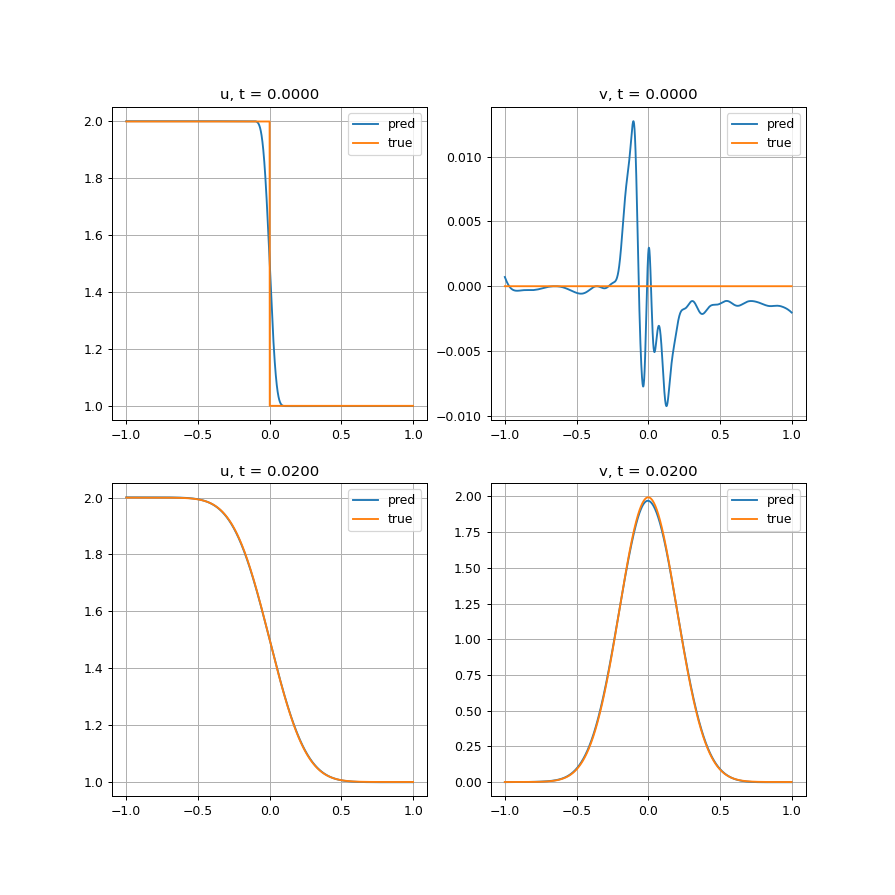

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(2, 2, figsize = (10, 10))


ax[0][0].plot(x_test, uv_pred[0][:, 0:1], label = "pred")
ax[0][0].plot(x_test, u_true[:, 0], label = "true")
ax[0][0].set_title("u, t = {:.4f}".format(t_test[0, 0]))

ax[0][1].plot(x_test, uv_pred[0][:, 1:2], label = "pred")
ax[0][1].plot(x_test, v_true[:, 0], label = "true")
ax[0][1].set_title("v, t = {:.4f}".format(t_test[0, 0]))

ax[1][0].plot(x_test, uv_pred[-1][:, 0:1], label = "pred")
ax[1][0].plot(x_test, u_true[:, -1], label = "true")
ax[1][0].set_title("u, t = {:.4f}".format(t_test[-1, 0]))

ax[1][1].plot(x_test, uv_pred[-1][:, 1:2], label = "pred")
ax[1][1].plot(x_test, v_true[:, -1], label = "true")
ax[1][1].set_title("v, t = {:.4f}".format(t_test[-1, 0]))

for i in range(2):
	for j in range(2):
		ax[i][j].legend()
		ax[i][j].grid()

plt.show()